# Implementing K-Means from Scratch

In this notebook, you will implement $k$-means from scratch. This is something you have to do once in your life as a data scientist.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/data/wines.csv", sep=";")

**TODO:** Implement the `assign_points_to_clusters()` and `recalculate_cluster_centroids()` functions below.

In [79]:
clusters = pd.concat(dists, axis=1).idxmin(axis=1)
data.groupby(clusters).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.136816,0.478868,0.277786,2.497295,0.079105,13.773010,39.337065,0.995849,3.289372,0.624521,10.614189,5.680970
1,6.915744,0.287287,0.341938,7.411384,0.049017,40.893373,159.386598,0.994929,3.190153,0.501184,10.203833,5.810015
2,6.904217,0.308869,0.309639,4.141499,0.047147,24.995315,98.809237,0.992927,3.206640,0.499264,11.014458,5.985274


In [80]:
def assign_points_to_clusters(data, centroids):
    """Assign each observation in data to the nearest centroid.
    
    Args:
      - data: an n x p Pandas DataFrame of observations.
      - centroids: a k x p Pandas DataFrame of cluster centroids.
    
    Returns:
      a vector of length n, consisting of numbers 0, 1, ..., k-1 
      indicating the cluster assignment of each observation.
    """
    k = centroids.shape[0]
    dists = []
    for i in range(k):
        dists.append(((data - centroids.iloc[i])**2).sum(axis=1))
    return pd.concat(dists, axis=1).idxmin(axis=1)
    
def recalculate_cluster_centroids(data, clusters):
    """Recalculate cluster centroids based on cluster assignments.
    
    Args:
      - data: an n x p Pandas DataFrame of observations
      - clusters: a vector of length n, with numbers 0, 1, ..., k-1,
                  indicating the cluster assignment of each observation.
    
    Returns:
      a k x p Pandas DataFrame of cluster centroids.
    """
    k = clusters.max() + 1
    return data.groupby(clusters).mean()

The function provided below runs $k$-means and plots the clusters and centroids at each iteration. The code has already been written for you, but you should read and understand the code.

In [81]:
def plot(data, centroids, clusters, ax, title):
    k = centroids.shape[0]
    for i in range(k):
        ax.plot(data[clusters == i].iloc[:, 0], data[clusters == i].iloc[:, 1], 'x', alpha=.2)
        ax.plot(centroids.iloc[i, 0], centroids.iloc[i, 1], 'ko')
    ax.set_title(title)

def run_k_means(data, k):
    
    # initialize the centroids to k randomly selected observations from the data set
    centroids = data.sample(k)
    clusters = assign_points_to_clusters(data, centroids)
    
    # repeat the above steps until the cluster assignments don't change
    while True:
        # plot data
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        plot(data, centroids, clusters, ax[0], "Assign Clusters to Centroids")
        
        # STEP 1: recalculate cluster centroids
        centroids = recalculate_cluster_centroids(data, clusters)
        
        # plot data
        plot(data, centroids, clusters, ax[1], "Recalculate Centroids")
        
        # STEP 2: assign points to nearest cluster
        new_clusters = assign_points_to_clusters(data, centroids)
        
        # if cluster assignments haven't changed, terminate the loop
        if all(new_clusters == clusters):
            break
        else:
            clusters = new_clusters
    
    return centroids, clusters

The code below tests the `run_k_means()` function you implemented above.

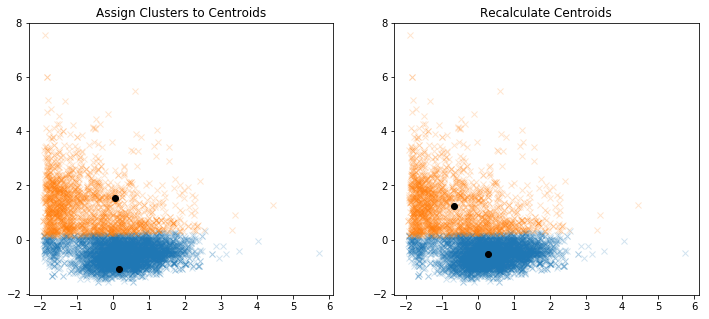

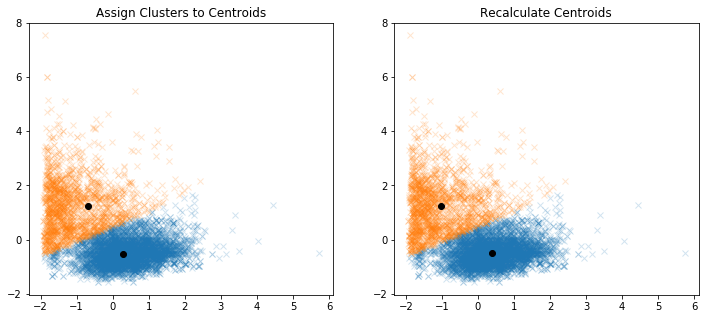

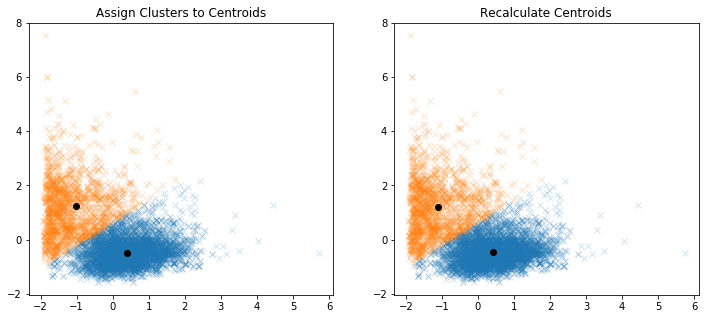

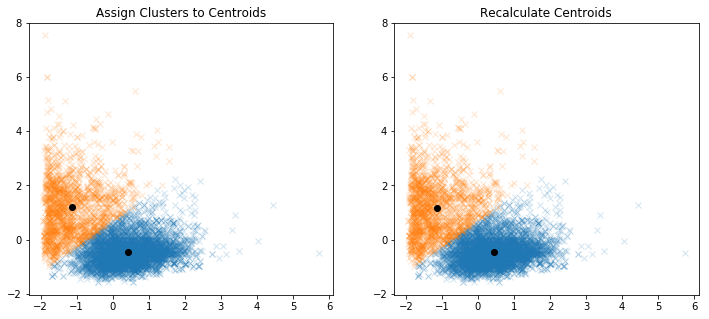

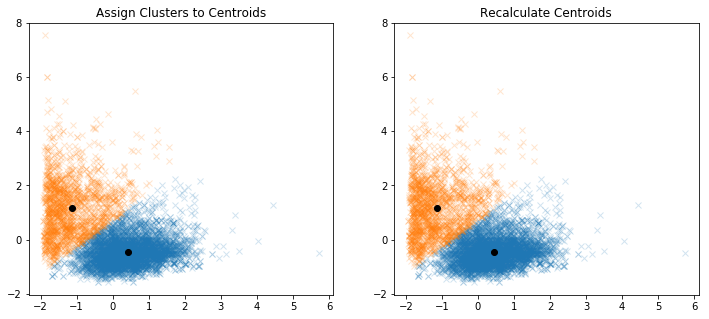

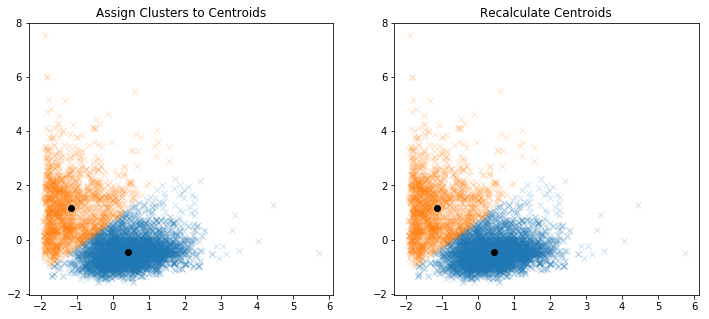

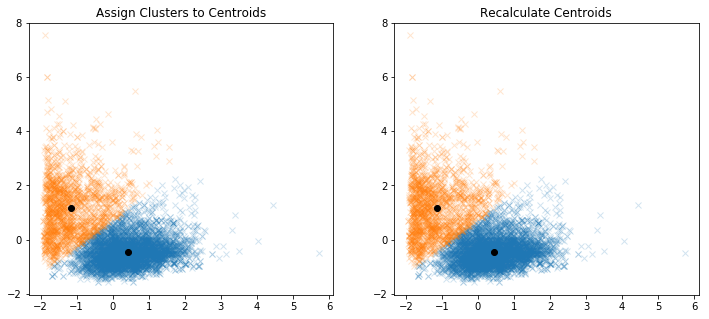

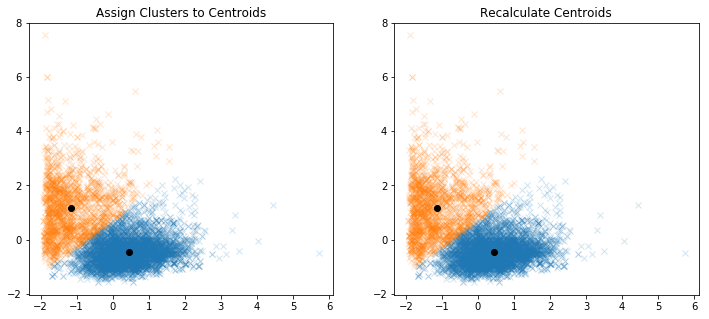

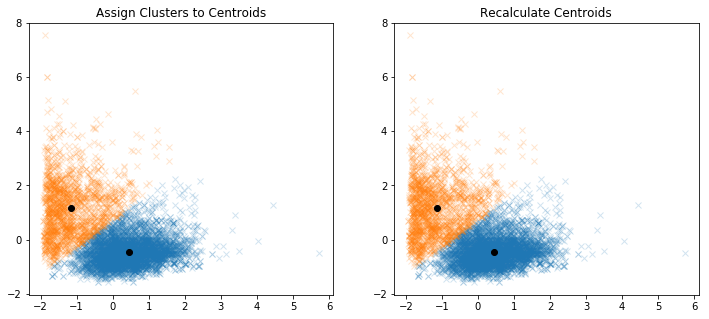

In [91]:
X = data[["total sulfur dioxide", "volatile acidity"]]

_, clusters = run_k_means((X - X.mean()) / X.std(), 2)

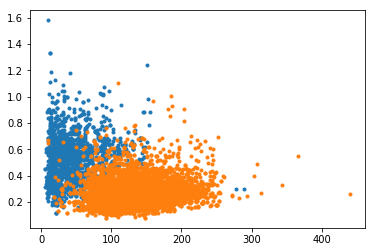

In [93]:
X = data[["total sulfur dioxide", "volatile acidity"]]

plt.plot(data.iloc[:1600]["total sulfur dioxide"], data.iloc[:1600]["volatile acidity"], '.')
plt.plot(data.iloc[1600:]["total sulfur dioxide"], data.iloc[1600:]["volatile acidity"], '.')

What do you notice about the clusters above? How would you correct this problem?